In [1]:
import numpy as np #computations
import pandas as pd # data manipulation and preprocessing
# EDA and visualization
import matplotlib.pyplot as plt
import seaborn as sns
# split test and train sets while building prediction model
from sklearn.model_selection import train_test_split
# measure model accuracy and evaluate
from sklearn.metrics import r2_score

In [2]:
df = pd.read_csv('/gld_price_data.csv')
df.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [4]:
df.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


<ipython-input-9-bde41751c621>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),cbar=True,annot=True,square=True,cmap='jet',annot_kws={'size':7})


<Axes: >

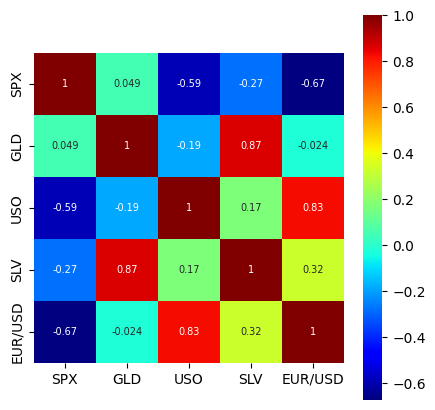

In [9]:
plt.figure(figsize=(5,5))
sns.heatmap(df.corr(),cbar=True,annot=True,square=True,cmap='jet',annot_kws={'size':7})

In [11]:
X = df.drop(columns = ['Date','GLD'])
Y = df['GLD']
X_train,X_test, Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=34)

In [13]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators=100)
regressor.fit(X_train,Y_train)
prediction = regressor.predict(X_test)
prediction

array([113.94810042, 124.53329951, 125.34820117, 116.75359974,
       114.44810129, 120.28670143, 162.83349788, 124.42450062,
       148.09260092, 101.242599  , 134.05849953, 154.46780154,
       166.49800094,  87.33659909, 119.0513012 , 161.38989871,
       160.21230235, 127.57830138, 153.53849788, 114.4937005 ,
        90.76489973, 115.17580003, 120.82529973,  87.54760002,
       109.16619899, 124.13169989,  71.44050086,  74.92609946,
       125.45470116, 122.58979997, 130.51039868, 166.40379755,
       109.22339859, 124.32689926, 126.9444989 , 109.0699013 ,
       128.36819833, 160.88580178, 114.99110083, 123.45290031,
       113.30769919, 164.95119673, 111.61079977, 106.94700116,
        94.98030123, 154.54460093, 163.35170025, 123.14219863,
       121.8641    , 121.0188009 ,  92.24670011, 105.06170062,
       124.2265004 , 142.34790128, 120.26129907, 154.36300135,
       120.40500002, 149.69250046, 118.91160098, 146.98969998,
       166.24400281, 128.92859876, 155.25030003, 112.47

In [26]:
error_score = r2_score(Y_test, prediction)
print("R squared error : ", error_score)

R squared error :  0.9882035184677433
